In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [13]:
#def plot_num_inputs_fig(input_file, output_file, title, model, xlim):
# plot_num_inputs_fig("../results/all_results.txt", "fig_num_inputs_base_sst2.pdf", "SST-2 (BERT-base, η=2e-5)", model="/conf-ai-data/trained/hf-bert-uncased_L-12_H-768_A-12-2e-5-sst2", xlim=(750,1850))

# cfg_name,model,exptype,diffinit,t,setting,attack_acc_with_same_ri,epsilon_with_same_ri,attack_acc_with_diff_ri,epsilon_with_diff_ri

input_file = 'all_mi_results.csv'
model = 'mnist_binary_lr'
setting = 'bolton'

df = pd.read_csv(input_file)

# Select only models for the specified models/task
df = df.query("cfg_name == '{}'".format(model))

# # Select only models extracted using specified setting
df = df.query("setting == '{}'".format(setting))

df = pd.melt(df, id_vars=['exptype'], value_vars=['epsilon_with_same_ri','epsilon_with_diff_ri'])

df.set_index('exptype')




   exptype              variable     value
0     fsfi  epsilon_with_same_ri  0.017876
1     fsfi  epsilon_with_same_ri  0.017876
2     fsfi  epsilon_with_same_ri  0.015773
3     fsfi  epsilon_with_same_ri  0.015773
4     fsfi  epsilon_with_same_ri  0.019980
5     fsfi  epsilon_with_same_ri  0.016825
6     fsfi  epsilon_with_same_ri  0.018928
7     fsfi  epsilon_with_diff_ri  0.017876
8     fsfi  epsilon_with_diff_ri  0.017876
9     fsfi  epsilon_with_diff_ri  0.016825
10    fsfi  epsilon_with_diff_ri  0.015773
11    fsfi  epsilon_with_diff_ri  0.019980
12    fsfi  epsilon_with_diff_ri  0.016825
13    fsfi  epsilon_with_diff_ri  0.018928


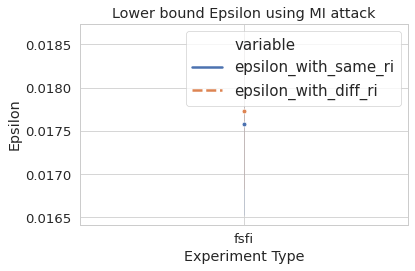

In [14]:
# Plot the figure
fig, ax = plt.figure(), plt.axes()
plot = sns.lineplot(data=df, x='exptype', y='value', hue='variable', style='variable', dashes=True, marker='o', ax=ax)

plot.set(xlabel="Experiment Type",  ylabel="Epsilon")

plot.set_title('Lower bound Epsilon using MI attack')
ax.legend(loc='lower right', labels=['Same Replace-Idx','Diff Replace-Idx'])
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig(output_file)
plt.show()